In [1]:
# this script use the fraction of vps in each bin to resprent the distribution regularity, aiming to avoid the undesired increase of vp counts in each bin 
#  caused by the expansion along x-direction, due to the fixed number of bins along x-direction during the whole process.
import pandas as pd
import numpy as np
# import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
cd D:

D:\


In [3]:
cd OneDrive/Lammps/nanoglass/20181015_500K_NPTb+500-300K_NPTb+300K_NVTb_xTen_E-2Aps/

D:\OneDrive\Lammps\nanoglass\20181015_500K_NPTb+500-300K_NPTb+300K_NVTb_xTen_E-2Aps


In [4]:
cd "data_analyses/microstructure/cluster/"

D:\OneDrive\Lammps\nanoglass\20181015_500K_NPTb+500-300K_NPTb+300K_NVTb_xTen_E-2Aps\data_analyses\microstructure\cluster


In [5]:
file_name = 'voronoi_500K_1200.data'
csv_name = file_name[:-5] +'.csv'

In [6]:
with open(file_name) as f:
    lines = f.readlines()

In [7]:
timestep = lines[1]
num_atoms = lines[3]
x_range, y_range, z_range = lines[5:8]
items = lines[8].split(' ')
columns = items[2:]
tables = lines[9:]

In [8]:
with open(csv_name,'w') as nf:
    for char in columns:
        nf.write(char+' ')
    for lines in tables:
        nf.write(lines)

In [9]:
origin_data = pd.DataFrame(pd.read_csv(csv_name, sep='\s+'))

In [10]:
origin_data['VoronoiIndices'] = '<'+origin_data['VoronoiIndex3'].map(str) +' '+origin_data['VoronoiIndex4'].map(str) +' '+origin_data['VoronoiIndex5'].map(str) +' '+origin_data['VoronoiIndex6'].map(str)+'>' 

In [11]:
data = origin_data.drop(['VoronoiIndex3','VoronoiIndex4','VoronoiIndex5','VoronoiIndex6'],axis='columns')

In [12]:
# data.head()

In [13]:
y_lower = (data.y.max()+data.y.min())*0.5 - (data.y.max()-data.y.min())*0.1

y_upper = (data.y.max()+data.y.min())*0.5 + (data.y.max()-data.y.min())*0.1

data_y = data.loc[(data.y >= y_lower) & (data.y <= y_upper)].sort_values('y')

In [14]:
# points= np.arange(len(data_y),5)
# quartiles = pd.cut(data_y.x, points).replace(np.nan,0)
bin_num = 50.
quartiles = pd.cut(data_y.x, bin_num)

In [15]:
x_dist = data_y.VoronoiIndices.groupby(quartiles).value_counts().unstack().replace(np.nan, 0.)

sum = x_dist.sum(axis=1)
x_dist_fraction = x_dist.div(sum,axis=0)*100

In [16]:
vp_num_rank = pd.Series(data_y.VoronoiIndices.value_counts())
vp_num_rank[20:] =np.nan
vp_top20 = vp_num_rank.dropna()

In [17]:
# x_dist.head()

In [18]:
# x_dist_fraction.head()

In [19]:
x_cor = pd.Series(np.arange(bin_num))
for i in range(len(x_dist.index)):
    x_cor[i] = x_dist.index[i].mid

df1=x_dist.reset_index().sort_values('x')

df1['x_cor'] =x_cor

df2=df1.set_index('x_cor').drop('x',axis=1)

df2.to_csv(file_name[:-5]+'_vp number.txt')


In [20]:
df1_f=x_dist_fraction.reset_index().sort_values('x')

df1_f['x_cor'] =x_cor

df2_f=df1_f.set_index('x_cor').drop('x',axis=1)

df2_f.to_csv(file_name[:-5]+'_vp fraction.txt')

<Figure size 1800x1200 with 0 Axes>

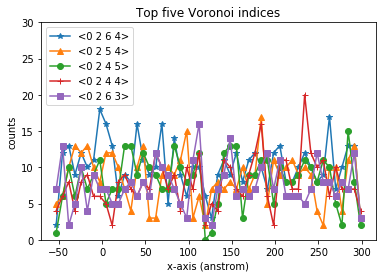

In [21]:
df3=df2[vp_top20.index[:5]]

fig = plt.figure(dpi=300)

fig.set(alpha=0.2)

df3.plot(ylim=(0,30),style=['*-','^-','o-','+-','s-'],title='Top five Voronoi indices')
plt.xlabel('x-axis (anstrom)')
plt.ylabel('counts')

plt.legend(loc='best')

fig_name = file_name[:-5]+'_vp number'+'.jpg'

plt.savefig(fig_name,dpi=300)


<Figure size 1800x1200 with 0 Axes>

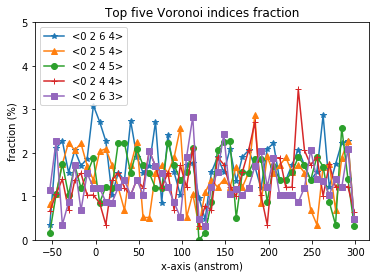

In [22]:
df3_f=df2_f[vp_top20.index[:5]]

fig = plt.figure(dpi=300)

fig.set(alpha=0.2)

df3_f.plot(ylim=(0,5),style=['*-','^-','o-','+-','s-'],title='Top five Voronoi indices fraction')
plt.xlabel('x-axis (anstrom)')
plt.ylabel('fraction (%)')

plt.legend(loc='best')

fig_name = file_name[:-5]+'_vp fraction'+'.jpg'

plt.savefig(fig_name,dpi=300)

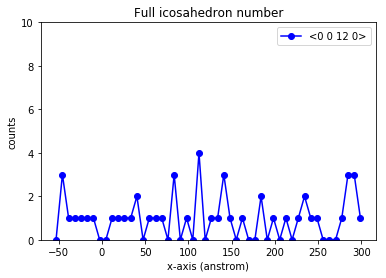

In [23]:
df4=df2['<0 0 12 0>']

df4.plot(ylim=(0,10),style='bo-', title='Full icosahedron number')
plt.xlabel('x-axis (anstrom)')
plt.ylabel('counts')
plt.legend(loc='best')

fig_name2 = file_name[:-5]+'_FI number'+'.jpg'

plt.savefig(fig_name2,dpi=300)

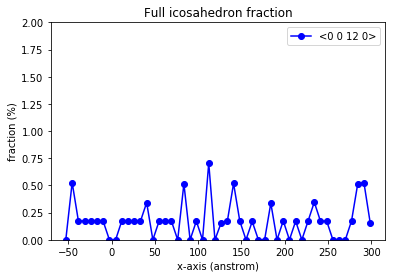

In [24]:
df4_f=df2_f['<0 0 12 0>']

df4_f.plot(ylim=(0,2),style='bo-', title='Full icosahedron fraction')
plt.xlabel('x-axis (anstrom)')
plt.ylabel('fraction (%)')
plt.legend(loc='best')

fig_name2 = file_name[:-5]+'_FI fraction'+'.jpg'

plt.savefig(fig_name2,dpi=300)